In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/1e7datasetcorr.csv', index_col=0)
df.tail()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,Omega3,f3,x3,y3,z3,vx3,vy3,vz3,Rel_Eerr,integ_time
Sim_ID,,,,,,,,,,,,,,,,,,,,,
4995,True,10000000.000000,10000000,0.000015,0.021544,0.053729,0.012454,0.005642,-1.657512,0.012805,...,-2.455928,-0.162476,0.008390,-0.073445,0.000225,23.145675,2.707954,0.045366,2.622256e-09,1437.494908
4996,True,10000000.000000,10000000,0.000015,0.021544,0.056524,0.013439,0.003143,0.454508,0.016073,...,2.849398,1.906923,-0.025937,0.072181,-0.000593,-21.424946,-7.242948,0.126097,1.469989e-08,1502.892072
4997,True,10000000.000000,10000000,0.000015,0.021544,0.058060,0.013990,0.009825,-0.543930,0.013198,...,1.792055,0.982644,-0.007582,0.076548,-0.000043,-22.647292,-2.002117,0.103816,7.680985e-09,1408.293117
4998,False,236555.546272,10000000,0.000015,0.021544,0.052558,0.012049,0.003733,-3.677540,0.004648,...,-3.022916,0.840517,0.031328,-0.060568,0.000609,21.634522,10.844146,-0.078264,6.473084e-07,33.453553
4999,False,19977.047066,10000000,0.000015,0.021544,0.051719,0.011762,0.015866,1.766786,0.011312,...,-1.104623,2.694640,0.067710,0.016891,0.000328,-5.630598,22.998094,0.025569,8.613444e-07,3.079377


In [2]:
def HillSep(system):
    return (system['a2']-system['a1'])/(system['a1']*system['RH/a'])
df['HillSep'] = df.apply(HillSep, axis=1)
df.head()

,Stable,Norbits_instability,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,...,f3,x3,y3,z3,vx3,vy3,vz3,Rel_Eerr,integ_time,HillSep
Sim_ID,,,,,,,,,,,,,,,,,,,,,
0,True,10000000.000000,10000000,0.000015,0.021544,0.056888,0.013569,0.005178,-3.070751,0.007067,...,-0.108162,-0.060508,-0.044636,-0.000307,13.734230,-18.555393,-0.036173,2.044850e-10,2039.672515,8.031818
1,True,10000000.000000,10000000,0.000015,0.021544,0.042687,0.008820,0.005101,-3.170275,0.007845,...,-0.343874,-0.045725,0.037512,0.000634,-16.384604,-19.975136,0.171042,3.447072e-09,1894.023723,8.389735
2,True,10000000.000000,10000000,0.000015,0.021544,0.059121,0.014375,0.001697,-1.033591,0.012845,...,3.419165,-0.008500,0.078357,0.001246,-22.158744,-2.450004,-0.160703,3.936231e-09,2163.505740,8.791310
3,False,1118280.215480,10000000,0.000015,0.021544,0.044759,0.009469,0.012078,-2.351669,0.001144,...,-0.829096,-0.058453,-0.002614,-0.000111,1.345952,-26.024377,0.047938,1.089428e-06,248.877695,7.176917
4,False,204524.639072,10000000,0.000015,0.021544,0.044721,0.009457,0.003099,0.417927,0.007009,...,-1.214839,0.056472,0.007511,0.000862,-3.526080,26.095055,0.150793,5.464036e-07,46.893125,5.412664


In [3]:
columns = ['HillSep']
for i in ['1', '2', '3']:
    #columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i, 'x'+i, 'y'+i, 'z'+i, 'vx'+i, 'vy'+i, 'vz'+i]
    columns += ['P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]

y = df['Stable']
X = df[columns]
X.head()

,HillSep,P1,e1,pomega1,inc1,Omega1,f1,P2,e2,pomega2,inc2,Omega2,f2,P3,e3,pomega3,inc3,Omega3,f3
Sim_ID,,,,,,,,,,,,,,,,,,,
0,8.031818,0.013569,0.005178,-3.070751,0.007067,-1.358434,1.905770,0.017238,0.009532,-2.617688,0.015850,-3.112144,1.770839,0.021092,0.015116,-2.397858,0.004372,-0.567081,-0.108162
1,8.389735,0.008820,0.005101,-3.170275,0.007845,-2.189106,-1.327490,0.011316,0.001877,0.178112,0.014587,2.719156,4.789547,0.014385,0.000042,2.798450,0.012593,1.437355,-0.343874
2,8.791310,0.014375,0.001697,-1.033591,0.012845,-2.075145,1.936078,0.018646,0.012119,3.812648,0.010144,0.995149,-3.577208,0.021883,0.007871,-1.740366,0.017363,-0.317958,3.419165
3,7.176917,0.009469,0.012078,-2.351669,0.001144,0.082737,5.261973,0.011748,0.005187,1.472345,0.017377,2.954753,-1.027543,0.014292,0.009527,-2.267802,0.002629,-2.294238,-0.829096
4,5.412664,0.009457,0.003099,0.417927,0.007009,-0.515504,-1.253795,0.011159,0.015303,1.394416,0.009367,1.738448,1.084883,0.013615,0.002124,1.347118,0.016188,-1.074927,-1.214839


In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
  
cv_s = StratifiedShuffleSplit(y_train,  n_iter=10 , test_size=0.1, random_state=42)

In [6]:
from sklearn.learning_curve import learning_curve
rfc = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=500) 
train_sizes, train_scores, test_scores = learning_curve(rfc,X,y,cv=cv_s,n_jobs=4, 
                                        train_sizes=np.logspace(-3,0,endpoint=True,num=20))

In [7]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

/home/adiv/astro/anaconda2/envs/ml/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Version 7.000


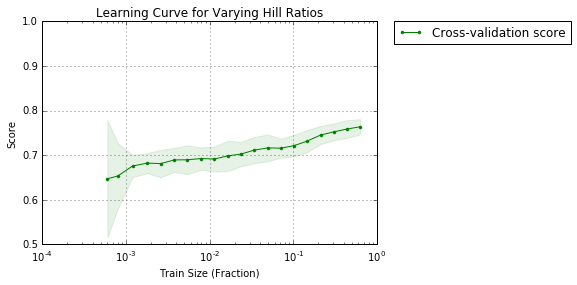

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.grid()
plt.fill_between(train_sizes/float(len(y)), train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes/float(len(y)), test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.semilogx(train_sizes/float(len(y)), test_scores_mean, '.-', color="g",
         label="Cross-validation score")
plt.xlabel('Train Size (Fraction)')
plt.ylabel('Score')
plt.ylim((0.5,1.0))
plt.title("Learning Curve for Varying Hill Ratios")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.savefig("learningcurve2d.pdf",bbox_inches='tight')